# Hypothesis testing: Methods of finding tests

CB Sections 8.1 and 8.2, DS Section 9.1

1. Introduction to Hypothesis testing
    - Example: Microelectronic Solder Joints
2. Statistical hypothesis testing in general
3. Likelihood ratio tests
4. Union-Intersection and Intersection-Union methods
5. Bayesian tests

## Hypothesis testing

**Statistical hypothesis**

A sraristical hypothesis is a statement about a population parameters.

There are two complimentary hypothesis in a hypothesis problem:
- Null hypothesis $H_0$
- Alternative hypothesis $H_1$

Let's set the parameter space as $\Theta$, usually:
- $H_0:\theta\in\Theta_0$ and $H_1:\theta\in\Theta_0^c$

For example:
- $H_0:\theta=0$ and $H_1:\theta\neq 0$

$\Theta=\Theta_0\cup\Theta_0^c$

Task: Use data to choose between $H_0$ and $H_1$

## Microelectronic Solder Joints – data

*Before* collecting the data the thicknesses are *random variables*

$X_i=$ the thickness of bond pad $i,i=1,2,...,16$
- We assume that $X_i\overset{iid}{\sim} N(\mu, 0.026^2),i=1,2,...,n$
- Want to investigate whether or not $\mu=2.775$ microns

The Observed data is (in microns)

2.72, 2.79, 2.81, 2.75, 2.77, 2.76, 2.75, 2.75,

2.81, 2.75, 2.74, 2.77, 2.79, 2.78, 2.80, 2.76

That is, $x_1=2.72, x_2=2.79, x_3=2.81,..., x_{16}=2.76$

Observed sample mean is 

$\bar{x}=\frac{1}{16}\sum_{i=1}^{16} x_i=2.76875$

Assuming that $X_1,X_2, ... ,X_n$ are a random sample we know that $\bar{X}$ is the **best unbiased estimator** of the population mean $\mu$

This new method is supposed to deposit a nickel layer with an average thickness of 2.775 microns

Based on data, our estimate of the average thickness $\mu$ is 2.76875 microns

**Is there a statistically significant difference between the sample average and the target value?**

## Microelectronic Solder Joints – decision rule
**Recall:**
- We expect the sample average to vary from sample to sample
- The sampling distribution of $\bar{X}$ is $N(\mu,0.026^2/16)$
- If $\mu=2.775$ the sampling distribution of $\bar{X}$ is
    
    $N(2.775,0.026^2/16)=N(2.775,0.04^2)$
- Is it plausible that 2.76875 comes from this distribution?
    - Yes!
        - There is *no evidence* that the new method does not perform to standards
        - We don't reject $H_0:\mu=2.775$

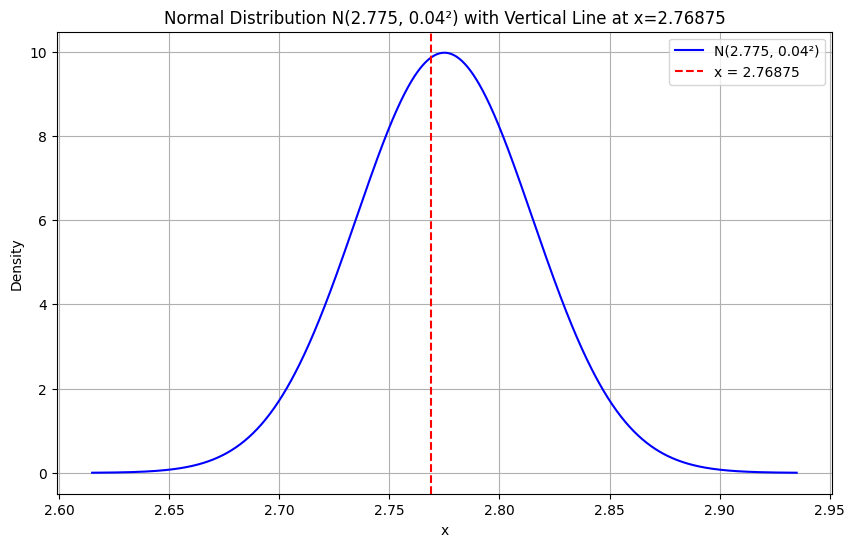

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the normal distribution
mu = 2.775
sigma = 0.04
x_vert = 2.76875

# Generate x values and the corresponding PDF
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'N({mu}, {sigma}²)', color='blue')
plt.axvline(x_vert, color='red', linestyle='--', label=f'x = {x_vert}')

# Labels and legend
plt.title('Normal Distribution N(2.775, 0.04²) with Vertical Line at x=2.76875')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


- What if we had observed $\bar{x}=2.65$?
- If $\mu=2.775$ the sample distribution of $\bar{X}$ is still

    $N(2.775,0.026/26)=N(2.775,0.04^2)$
- Is it plausible that 2.65 comes from this distribution?
    - No!
        - We *have evidence* that the new method does not perform to standards.
        - We reject $H_0: \mu=2.775$

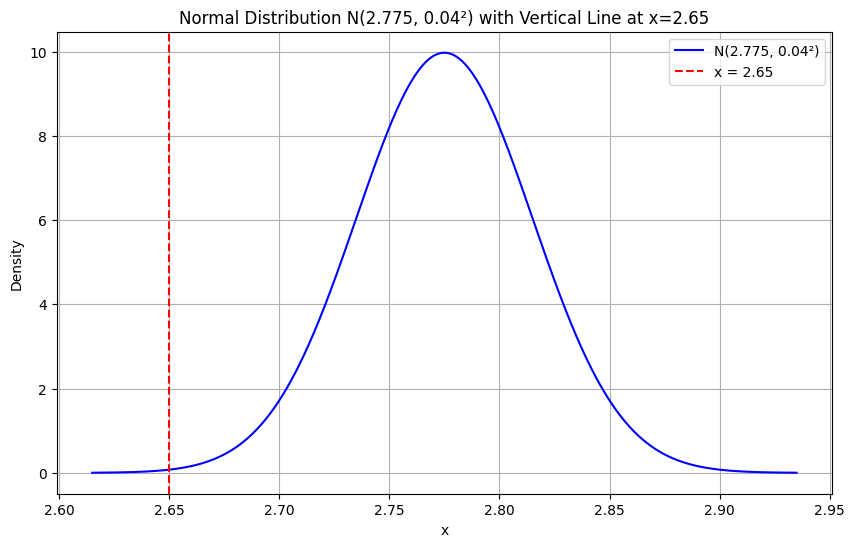

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the normal distribution
mu = 2.775
sigma = 0.04
x_vert = 2.65

# Generate x values and the corresponding PDF
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'N({mu}, {sigma}²)', color='blue')
plt.axvline(x_vert, color='red', linestyle='--', label=f'x = {x_vert}')

# Labels and legend
plt.title('Normal Distribution N(2.775, 0.04²) with Vertical Line at x=2.65')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

- Sampling distribution of $\bar{X}$ (if $H_0$ is true): $N(2.775,0.026^2/16):$

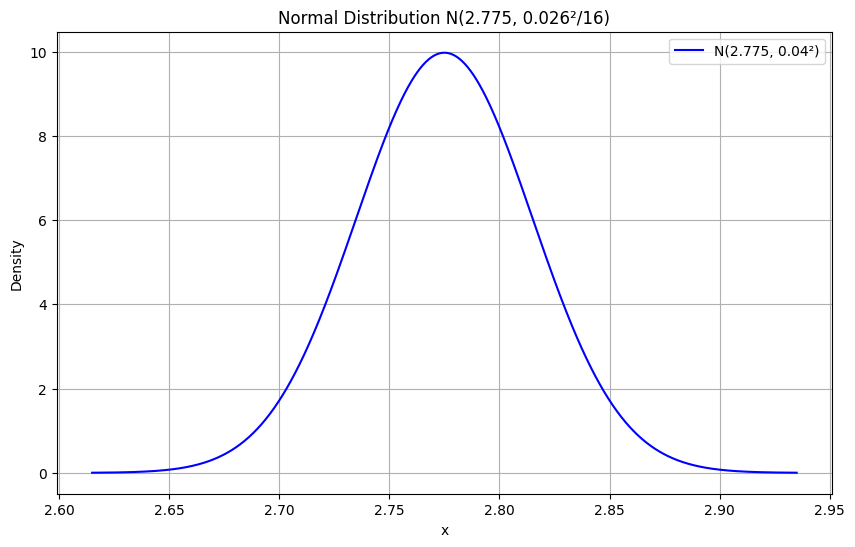

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the normal distribution
mu = 2.775
sigma = 0.04
x_vert = 2.65

# Generate x values and the corresponding PDF
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'N({mu}, {sigma}²)', color='blue')

# Labels and legend
plt.title('Normal Distribution N(2.775, 0.026²/16)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

- Then (if $H_0$ is true):

    $P(2.709\leq\bar{X}\leq 2.841)=0.90$ and

    $P(2.696\leq\bar{X}\leq 2.854)=0.95$ and

    $P(2.671\leq\bar{X}\leq 2.879)=0.99$
- Suggestion for *decision rule:* Reject $H_0$ if the observed value of $\bar{X}$ is less than 2.696 or larger than 2.854.
    - The *critical region:* $(-\infty,2.696)\cup(2.854,\infty)$

## Microelectronic Solder Joints – summary

- Data model: $X_1,X_2,...,X_n$ is a random sample from $N(\theta,0.026^2)$
- Null hypothesis $H_0:\theta=2.775$
- Alternative hypothesis $H_1:\theta\neq 2.775$
- Decision rule: Reject $H_0$ if $\bar{x}<2.696$ or $\bar{x}>2.854$

Where we are going:
- How to come up with decision rules - Section 8.2
- How to evaluate hypothesis tests - Section 8.3

## Hypothesis testing

**Statistical hypothesis**

A statistical hypothesis is a statement about a population parameter(s).

There are two complimentary hypothesis in a hypothesis problem:
- Null hypothesis $H_0$
- Alternative hypothesis $H_1$

Usually:

$H_0:\theta\in\Theta_0$ and $H_1:\theta\in\Theta_0^c$ 

Examples:

$H_0:\theta\leq\theta_0$ and $H_1:\theta>\theta_0$

$H_0:\theta=\theta_0$ and $H_1:\theta\neq\theta_0$

## Hypothesis test

**Hypothesis test**

A hypothesis testing procedure is a rule that specifies
- For which sample vaules the decision is made to accept $H_0$ as true
- For which sample values $H_0$ is rejected and $H_1$ is accepted as true

Also called a *decision rule*

Accepting $H_0$ versus not rejecting $H_0$
- Intro Stats: We never accept $H_0$!! - Why?
- Here: Decision between $H_0$ and $H_1$
- Accept one, reject the other.

## Accepting $H_0$ versus not rejecting $H_0$

Recall the argument the hypothesis testing procedure is built upon
- Assuming that $H_0$ is true, we find the sampling distribution of a test statistic.
- If the observed test statistic looks like an observation from the sampling distribution (under the null):

    $\to$ We Accept $H_0$ (and Reject $H_1$)

    We did not find a contradiction/evidence
- If the observed test statistic does not look like an observation from the sampling distribution:

    $\to$ We Reject $H_0$ (and Accept $H_1$)

    We found a contradiction/evidence

    

- The meaning of "Accept" is subtlety different depending on whether we are accepting $H_0$ or $H_1$
    - Accepting $H_0$ is an inconclusive statement
    - Accepting $H_1$ means we have evidence that $H_0$ is not true
- Therefore, we never accept $H_0$ in introductory statistics courses, only "fail to reject" $H_0$
- This course: I will assume htat you understand difference and you can use either "Accept" or "fail to reject" $H_0$

## Hypothesis test

- Rejection region: The subset of the sample space $\mathcal{X}$ for which $H_0$ is rejected
    - Also called critical region
    - Example: Reject $H_0$ if $\mathbf{x}\in R$ where

        $R=\{\mathbf{x}=(x_1,...,x_n):\bar{x}<2.671 \text{ or }\bar{x}>2.879\}$ 
- Acceptance region: The subset of the sample space $\mathcal{X}$ for which $H_0$ is accepted
    - Acceptance region is the complement of the rejection region
    - Example: Accept $H_0$ if $\mathbf{x}\in R^c$
- A decision rule is usually specified in terms of a *test statistic* $W(\mathbf{X})=T$


### Example of a hypothesis test: z-test

- $X_1,...,X_n$ random sample from $N(\mu,\sigma^2)$, $\sigma^2$ known
- *Hypothesis*: $H_0:\mu=2.7$ vs. $H_1:\mu\neq 2.7$
- *Decision rule:* Reject $H_0$ if

    $|z|=|\frac{\bar{x}-2.7}{\sigma/\sqrt{n}}|>z_{0.025}$

    where $\bar{x}$ is the observed sample mean
- Critical region:

    $\left\{\mathbf{x} \in \mathbb{R}^{n}:\left|\frac{\bar{x}-2.7}{\sigma / \sqrt{n}}\right|>z_{0.025}\right\}$

    Or:

    $\left\{t \in \mathbb{R}:\left|\frac{t-2.7}{\sigma / \sqrt{n}}\right|>z_{0.025}\right\}$



## Methods of finding tests

- Likelihood ratio tests – Section 8.2.1
- Union-Intersection (and Intersection-union) tests – Section 8.2.3
- Bayesian tests – Section 8.2.2

## Likelihood ratio tests

- Likelihood function for a random sample $X_1,...,X_n$:

    $L(\theta \mid \mathbf{x})=f(\mathbf{x} \mid \theta)=\prod_{i=1}^{n} f\left(x_{i} \mid \theta\right)$
- **Def: Likelihood ratio tests**

    The likelihood ratio test statistic for testing $H_0: \theta\in\Theta_0$ versus $H_1:\theta\in\Theta_0^c$ is

    $\lambda(\mathbf{x})=\frac{sup_{\Theta_0}L(\theta|\mathbf{x})}{sup_{\Theta}L(\theta|\mathbf{x})}$

    A likelihood ratio test (LRT) is any test that has a rejection region of the form

    $\{\mathbf{x}:\lambda(\mathbf{x})\leq c\}$ where $0\leq c\leq 1$

## The likelihood ratio

$\lambda(\mathbf{x})=\frac{sup_{\Theta_0}L(\theta|\mathbf{x})}{sup_{\Theta}L(\theta|\mathbf{x})}$ Reject $H_0$ if $\lambda(\mathbf{x})\leq c$
- $0\leq\lambda(\mathbf{x})\leq 1$
- $sup_{\Theta}L(\theta|\mathbf{x})=L(\hat{\theta}|\mathbf{x})$ where $\hat{\theta}$ is the MLE of $\theta$
- $sup_{\Theta_0}L(\theta|\mathbf{x})=L(\hat{\theta}_0|\mathbf{x})$ where $\hat{\theta}_0$ maximizes $L(\theta|\mathbf{x})$ over $\Theta_0$ only
- $sup$ is usually the same as max.
    - **Supremum:** Let $S$ be a set of real numbers. An upper bound for $S$ is a number $B$ such that $x\leq B$ for all $x\in S$. The supremum of $S$ is the smallest upper bound for $S$. A supremum which actually belongs to the set $S$ is called a maximum.
    - Example: The open set $(0,1)$ does not have a maximum, but the supremum is $1$.
- Note: $sup_{\Theta_0}L(\theta|\mathbf{x})\leq sup_{\Theta}L(\theta|\mathbf{x})$, because $\Theta_0\subset\Theta$

## The likelihood ratio test

$\lambda(\mathbf{x})=\frac{sup_{\Theta_0}L(\theta|\mathbf{x})}{sup_{\Theta}L(\theta|\mathbf{x})}$ Reject $H_0$ if $\lambda(\mathbf{x})\leq c$

- Reject $H_0$ if $sup_{\Theta_0}L(\theta|\mathbf{x})\leq c\cdot sup_{\Theta}L(\theta|\mathbf{x})=c\cdot L(\hat\theta|\mathbf{x})$
- Intuition: If $L(\theta_1|\mathbf{x})$: the observed data $\mathbf{x}$ is more likely when the parameter value is equal to $\theta_2$ than when it is $\theta_1$
- If $\lambda(\mathbf{x})$ is small:
    - There is a parameter value in $\Theta_0^c$ for which the observed data are much more likely than for any parameter in $\Theta_0$
    - $H_0$ should ne rejected
- How to select $c$? - later...

$\lambda(\mathbf{x})=\frac{sup_{\Theta_0}L(\theta|\mathbf{x})}{sup_{\Theta}L(\theta|\mathbf{x})}=\frac{sup_{\Theta_0}L(\theta|\mathbf{x})}{L(\hat{\theta}|\mathbf{x})}$
- Know that $sup_{\Theta_0}L(\theta|\mathbf{x})\leq L(\hat{\theta}|\mathbf{x})$
- If $\lambda(\mathbf{x})$ is close to **1**, that is to say $sup_{\Theta_0}L(\theta|\mathbf{x})$ is close to $L(\hat{\theta}|\mathbf{x})$, then we accept that $\theta\in\Theta_0$

Let's **assume** $sup_{\Theta_0}L(\theta|\mathbf{x})=L(\theta^*|\mathbf{x})$, where $\theta^*\in\Theta_0$

- $\lambda(\mathbf{x})$ is close to 1: 
    - $\theta^*$ is almost as plausible value of $\theta$ as $\hat{\theta}$ is, so $H_0$ should not be rejected.
- $\lambda(\mathbf{x})$ is small:
    - $\theta^*$ is much less plausible value of $\theta$ as $\hat{\theta}$ is, so $H_0$ should be rejected.

## LRT Example: Normal Model, Variance Known

- Let $ X_1, X_2, \ldots, X_n $ be a random sample from $ N(\theta, 1) $.

- Find the form of the likelihood ratio test (LRT) for the following hypotheses:  
(a) $ H_0 : \theta = \theta_0 $ vs. $ H_1 : \theta \neq \theta_0 $  
(b) $ H_0 : \theta \leq \theta_0 $ vs. $ H_1 : \theta > \theta_0 $  
(c) $ H_0 : \theta \geq \theta_0 $ vs. $ H_1 : \theta < \theta_0 $

    $\begin{aligned}
    L(\theta|\mathbf{x})
    &=\prod_{i=1}^n\frac{1}{\sqrt{2\pi}}exp(-\frac{(x_i-\theta)^2}{2})\\
    &=(2\pi)^{-n/2}exp(-\frac{1}{2}\sum_{i=1}^n(x_i-\theta)^2)
    \end{aligned}$

    Know: About the denominator $L(\hat{\theta}|\mathbf{x})$ for $\lambda(\mathbf{x})$ in $(a),(b),(c)$, $\hat{\theta}_{MLE}=\bar{x}$. Thus,

    $\begin{aligned}
    L(\hat{\theta}|\mathbf{x})
    &=(2\pi)^{-n/2}exp(-\frac{1}{2}\sum_{i=1}^n(x_i-\bar{x})^2)\\
    &=(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)\\
    &\text{where } s^2=\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x}^2)
    \end{aligned}$   



- (a) $H_0:\theta=\theta_0$ vs. $H_1:\theta\neq\theta_0$

    $\Rightarrow\Theta_0=\{\theta_0\}$ (just one point)

    $\begin{aligned}
    sup_{\Theta_0}L(\theta|\mathbf{x})
    &=L(\theta_0|\mathbf{x})\\
    &=(2\pi)^{-n/2}exp(-\frac{1}{2}\sum_{i=1}^n(x_i-\theta_0)^2)\\
    &=(2\pi)^{-n/2}exp(-\frac{1}{2}((n-1)s^2+n(\bar{x}-\theta_0)^2))\\
    \end{aligned}$

    **Simplification worth remembering:**

    $\begin{aligned}
    \sum_{i=1}^n(x_i-\theta)^2
    &=\sum_{i=1}^n(x_i-\bar{x}+\bar{x}-\theta)^2\\
    &=\sum_{i=1}^n(x_i-\bar{x})^2+\sum_{i=1}^n(\bar{x}-\theta)^2+2\sum_{i=1}^n(x_i-\bar{x})(\bar{x}-\theta)\\
    &\text{where }2\sum_{i=1}^n(x_i-\bar{x})(\bar{x}-\theta)=2(\bar{x}-\theta)\sum_{i=1}^n(x_i-\bar{x})=0\\
    &=(n-1)s^2+n(\bar{x}-\theta)^2
    \end{aligned}$

    $\begin{aligned}\lambda(\mathbf{x})
    &=\frac{(2\pi)^{-n/2}exp(-\frac{1}{2}((n-1)s^2+n(\bar{x}-\theta_0)^2))}{(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)}\\
    &=exp(-\frac{n}{2}(\bar{x}-\theta_0)^2)
    \end{aligned}$

    The LRT: Reject if $\lambda(\mathbf{x})\leq c$ where $c\in[0,1]$, thus

    $\begin{aligned}
    &exp(-\frac{n}{2}(\bar{x}-\theta_0)^2)\leq c\\
    &(\bar{x}-\theta_0)^2\geq-\frac{2}{n}\ln c\\
    &|\bar{x}-\theta_0|\geq\sqrt{-\frac{2}{n}\ln c}\\
    &|\frac{\bar{x}-\theta_0}{1/\sqrt{n}}|\geq\sqrt{-2\ln c}\equiv C\\
    &\text{where }c\in[0,1]
    \end{aligned}$

    **It is same form as the 2-sided Z-test!**


- (b) $ H_0 : \theta \leq \theta_0 $ vs. $ H_1 : \theta > \theta_0 $

    $\begin{aligned}
    L(\theta|\mathbf{x})
    &=L(\theta|\mathbf{x})\\
    &=(2\pi)^{-n/2}exp(-\frac{1}{2}\sum_{i=1}^n(x_i-\theta)^2)\\
    &=(2\pi)^{-n/2}exp(-\frac{1}{2}((n-1)s^2+n(\bar{x}-\theta)^2))\\
    &=(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)\cdot exp(-\frac{n}{2}(\bar{x}-\theta)^2)\\
    &\text{where }(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)\text{ is a positive constant.}
    \end{aligned}$

    $\begin{aligned}
    \frac{dL(\theta|\mathbf{x})}{d\theta}
    &=(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)\cdot\frac{dexp(-\frac{n}{2}(\bar{x}-\theta)^2)}{d\theta}\\
    &=(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)\cdot exp(-\frac{n}{2}(\bar{x}-\theta)^2)\cdot (-n(\bar{x}-\theta))\cdot (-1)\\
    &=(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)\cdot exp(-\frac{n}{2}(\bar{x}-\theta)^2)\cdot n(\bar{x}-\theta)\\
    &\text{where }(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)\cdot exp(-\frac{n}{2}(\bar{x}-\theta)^2)>0\\
    \end{aligned}$

    Set $\frac{dL(\theta|\mathbf{x})}{d\theta}=0$, $\theta=\bar{x}$.

    $\begin{aligned}
    \frac{d^2L(\theta|\mathbf{x})}{d\theta^2}
    &=(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)\cdot \frac{d}{d\theta} [exp(-\frac{n}{2}(\bar{x}-\theta)^2)\cdot n(\bar{x}-\theta)]\\
    &=(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)\cdot [exp(-\frac{n}{2}(\bar{x}-\theta)^2)\cdot n^2(\bar{x}-\theta)^2-n\cdot exp(-\frac{n}{2}(\bar{x}-\theta)^2)]\\
    &=(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)\cdot (-n)<0\quad\text{because } \theta=\bar{x}.
    \end{aligned}$

    So, in $\theta=\bar{x},L(\theta|\mathbf{x})$ has the maximum, just like the following image. 



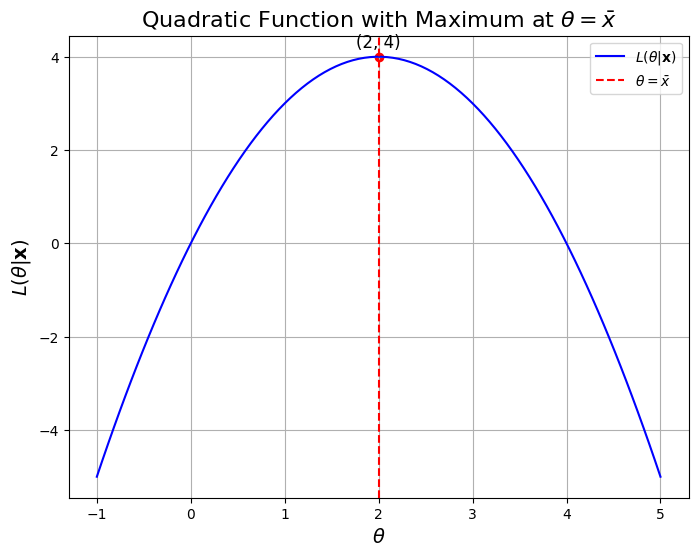

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
x_bar = 2  # The value of theta where the maximum occurs
M = 4      # The maximum value of the function

# Define the quadratic function L(theta|x) = -theta^2 + 2*\bar{x}*theta + (M - \bar{x}^2)
def L_theta(theta, x_bar, M):
    return -theta**2 + 2 * x_bar * theta + (M - x_bar**2)

# Generate a range of theta values (centered around \bar{x})
theta = np.linspace(x_bar - 3, x_bar + 3, 100)  # theta ranges from \bar{x}-3 to \bar{x}+3
L = L_theta(theta, x_bar, M)  # Calculate corresponding L values

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(theta, L, label=r'$L(\theta|\mathbf{x})$', color='blue')
plt.axvline(x=x_bar, color='red', linestyle='--', label=r'$\theta = \bar{x}$')
plt.scatter([x_bar], [M], color='red')  # Mark the maximum point
plt.text(x_bar, M + 0.2, f'({x_bar}, {M})', fontsize=12, ha='center')

# Set axis labels
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$L(\theta|\mathbf{x})$', fontsize=14)
plt.title(r'Quadratic Function with Maximum at $\theta = \bar{x}$', fontsize=16)

# Add grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

- Continue (b):

    According to this graph, we have $L(\theta|\mathbf{x})$ is monotone increasing on $\theta\in(-\infty,\bar{x})$ and monotone decreasing on $\theta\in(\bar{x},\infty)$. 

    $H_0:\theta\leq\theta_0\Leftrightarrow\Theta_0=(-\infty,\theta_0]$.
    
    $\theta_0$ on the monotone increasing interval $(-\infty,\bar{x})$ or the monotone decreasing interval $(\bar{x},\infty)$ will influence the value of $sup_{\theta\in\Theta_0}L(\theta|\mathbf{x})$ (maximum).

    $sup_{\theta\in\Theta_0}L(\theta|\mathbf{x})=
    \begin{cases}
    &L(\hat{\theta}|\mathbf{x})\quad\text{if } \theta_0\geq\bar{x}\\
    &L(\theta_0|\mathbf{x})\quad\text{if } \theta_0<\bar{x}\\
    \end{cases}$

    For example, as shown in the following image, if $\theta_0=1<\bar{x}$ on increasing interval, the maximum is on this point $\theta_0=1$, but maximum is on the point $\bar{x}$, if $\theta_0=3\geq\bar{x}$ on increasing interval.

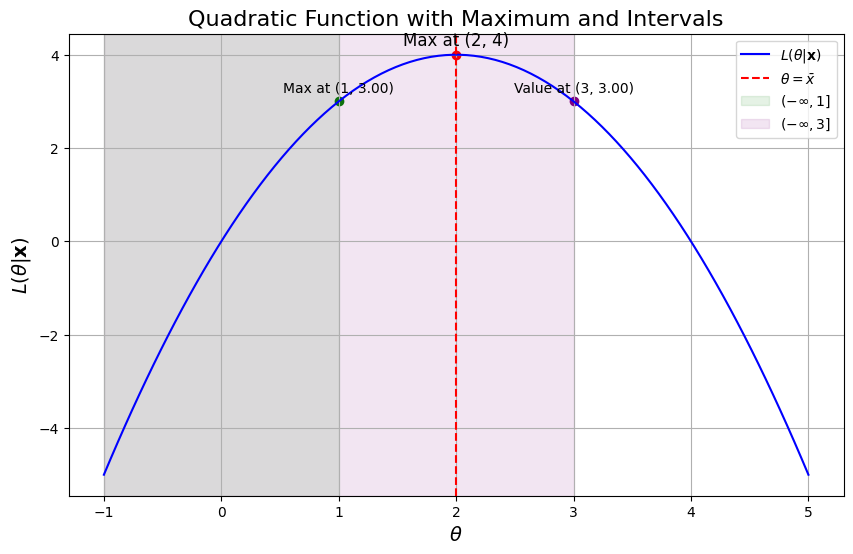

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
x_bar = 2  # The value of theta where the maximum occurs
M = 4      # The maximum value of the function

# Define the quadratic function L(theta|x) = -theta^2 + 2*\bar{x}*theta + (M - \bar{x}^2)
def L_theta(theta, x_bar, M):
    return -theta**2 + 2 * x_bar * theta + (M - x_bar**2)

# Generate a range of theta values (centered around \bar{x})
theta = np.linspace(-1, 5, 100)  # Expanded range to show the intervals clearly
L = L_theta(theta, x_bar, M)  # Calculate corresponding L values

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(theta, L, label=r'$L(\theta|\mathbf{x})$', color='blue')
plt.axvline(x=x_bar, color='red', linestyle='--', label=r'$\theta = \bar{x}$')
plt.scatter([x_bar], [M], color='red')  # Mark the maximum point
plt.text(x_bar, M + 0.2, f'Max at ({x_bar}, {M})', fontsize=12, ha='center')

# Define intervals and find maximum values within them
interval_1_end = 1  # End of interval (-\infty, 1]
interval_2_end = 3  # End of interval (-\infty, 3]

# For interval (-\infty, 1], maximum is at theta = 1 (since 1 < x_bar)
L_at_1 = L_theta(interval_1_end, x_bar, M)
plt.scatter([interval_1_end], [L_at_1], color='green')
plt.text(interval_1_end, L_at_1 + 0.2, f'Max at ({interval_1_end}, {L_at_1:.2f})', fontsize=10, ha='center')
plt.axvspan(-1, interval_1_end, alpha=0.1, color='green', label=r'$(-\infty, 1]$')

# For interval (-\infty, 3], maximum is at theta = x_bar (since x_bar = 2 < 3)
L_at_3 = L_theta(interval_2_end, x_bar, M)
plt.scatter([interval_2_end], [L_at_3], color='purple')
plt.text(interval_2_end, L_at_3 + 0.2, f'Value at ({interval_2_end}, {L_at_3:.2f})', fontsize=10, ha='center')
plt.axvspan(-1, interval_2_end, alpha=0.1, color='purple', label=r'$(-\infty, 3]$')

# Set axis labels
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$L(\theta|\mathbf{x})$', fontsize=14)
plt.title(r'Quadratic Function with Maximum and Intervals', fontsize=16)

# Add grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

- Continue (b):

    $\lambda(\mathbf{x})=
    \begin{cases}
    &\frac{L(\hat{\theta}|\mathbf{x})}{L(\hat{\theta}|\mathbf{x})}=1\quad\text{if }\theta_0\geq\bar{x}\quad(1)\\
    &\frac{L(\theta_0|\mathbf{x})}{L(\hat{\theta}|\mathbf{x})}= \frac{(2\pi)^{-n/2}exp(-\frac{1}{2}((n-1)s^2+n(\bar{x}-\theta_0)^2))}{(2\pi)^{-n/2}exp(-\frac{n-1}{2}s^2)}=exp(-\frac{n}{2}(\bar{x}-\theta_0)^2)\quad\text{if }\theta_0<\bar{x}\quad(2)
    \end{cases}$

    - $(1)$ If $\theta_0\geq\bar{x}$, we fail to reject $H_0$.

    - $(2)$ If $\theta_0<\bar{x}$, we have 

        $\begin{aligned}
        &exp(-\frac{n}{2}(\bar{x}-\theta_0)^2)\leq c\\
        &(\bar{x}-\theta_0)^2\geq-\frac{2}{n}\ln c\\
        &\bar{x}-\theta_0\geq\sqrt{-\frac{2}{n}\ln c}\quad\text{where }\bar{x}>\theta_0\\
        &\bar{x}\geq\theta_0+\sqrt{-\frac{2}{n}\ln c}\Leftrightarrow\frac{\bar{x}-\theta_0}{1/\sqrt{n}}\geq\sqrt{-\frac{1}{2}\ln c}
        \end{aligned}$

        Therefore, reject iff $\theta_0<\bar{x}$ and $\frac{\bar{x}-\theta_0}{1/\sqrt{n}}\geq\sqrt{-\frac{1}{2}\ln c}$.

        It is a one-sided Z-test.

        